In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import gensim

# Load Google's pre-trained Word2Vec model.
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/STAT628_Module3/bars/feature extraction/GoogleNews-vectors-negative300.bin.gz', binary=True)  

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

Stopword list has 403 entries

======================= Analysis for AB ==============================

positive vocabulary has 1221 distinct terms
negative vocabulary has 1096 distinct terms

Created 4000 X 1221 positive document-term matrix
Created 2945 X 1096 negative document-term matrix

rank for positive words in AB :
01. service (1817.00)
02. time (1521.00)
03. amaze (1125.00)
04. menu (1086.00)
05. delicious (1048.00)
06. calgary (1042.00)
07. drink (1015.00)
08. staff (839.00)
09. bar (817.00)
10. friendly (787.00)

rank for negative words in AB :
01. service (1847.00)
02. time (1624.00)
03. drink (1460.00)
04. table (1277.00)
05. ask (1163.00)
06. server (1108.00)
07. wait (963.00)
08. waitress (833.00)
09. bar (795.00)
10. minutes (729.00)
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2235
K=04: Coherence=0.1970
K=05: Coherence=0.2050
K=06: Coherence=0.2169
K=07: Coherence=0.1935
K=08: Coherence=0.1830
K=09: Coherence=0.1903
K=10: Coherence=0.1944


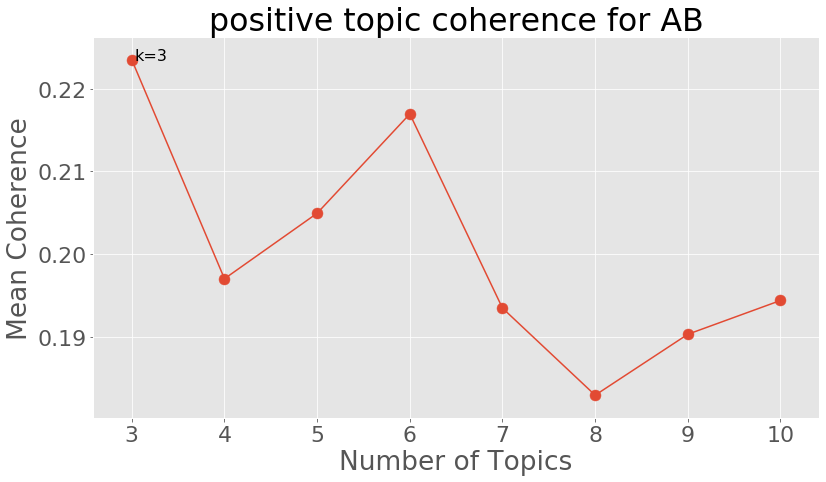


descriptors for positive texts in AB :
Topic 01: menu, delicious, dish, sauce, taste, cheese, pizza
Topic 02: bar, drink, beer, night, time, calgary, staff
Topic 03: service, time, amaze, excellent, calgary, experience, staff
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1990
K=04: Coherence=0.1859
K=05: Coherence=0.2043
K=06: Coherence=0.2054
K=07: Coherence=0.2121
K=08: Coherence=0.1913
K=09: Coherence=0.1928
K=10: Coherence=0.1876


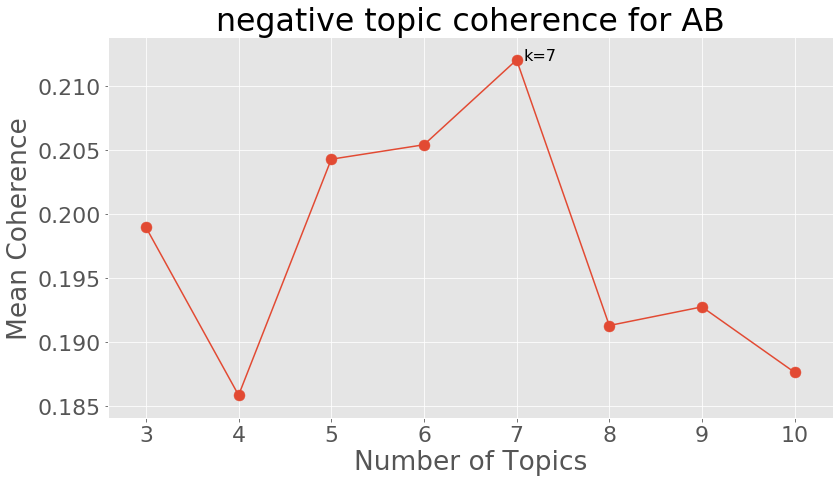


descriptors for negative texts in AB :
Topic 01: table, wait, minutes, sit, seat, arrive, ask
Topic 02: steak, menu, salad, look, taste, chicken, meal
Topic 03: wing, night, chicken, sauce, hot, taste, dry
Topic 04: bar, beer, drink, pub, look, music, beers
Topic 05: service, server, slow, customer, poor, staff, experience
Topic 06: drink, server, ask, bill, tell, pay, leave
Topic 07: time, wait, long, know, minutes, day, experience

======================= Analysis for AZ ==============================

positive vocabulary has 7493 distinct terms
negative vocabulary has 6093 distinct terms

Created 118986 X 7493 positive document-term matrix
Created 56549 X 6093 negative document-term matrix

rank for positive words in AZ :
01. service (45627.00)
02. time (39278.00)
03. amaze (30954.00)
04. drink (28078.00)
05. bar (27803.00)
06. delicious (24875.00)
07. friendly (21292.00)
08. staff (20743.00)
09. menu (19463.00)
10. nice (18041.00)

rank for negative words in AZ :
01. service (3268

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2497
K=04: Coherence=0.2330
K=05: Coherence=0.2132
K=06: Coherence=0.2028
K=07: Coherence=0.2123
K=08: Coherence=0.2115
K=09: Coherence=0.2122
K=10: Coherence=0.2226


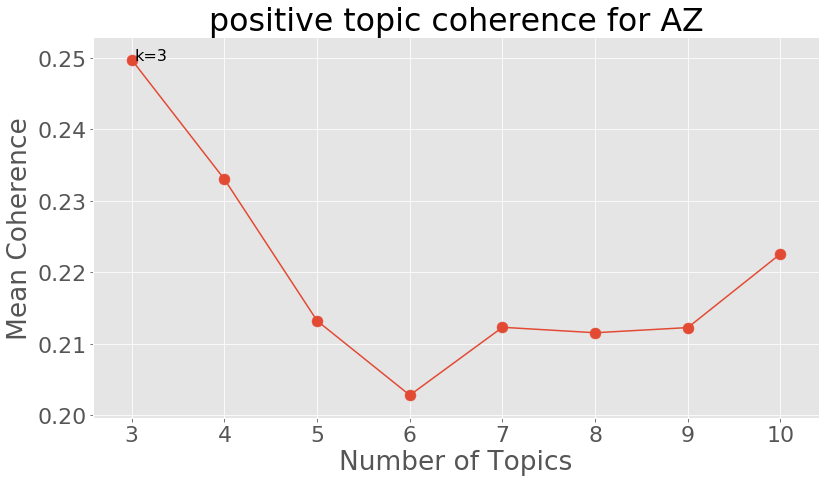


descriptors for positive texts in AZ :
Topic 01: delicious, menu, cheese, chicken, sauce, fry, salad
Topic 02: bar, drink, beer, night, staff, friendly, fun
Topic 03: time, service, amaze, experience, excellent, friendly, recommend
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1684
K=04: Coherence=0.2017
K=05: Coherence=0.2048
K=06: Coherence=0.1933
K=07: Coherence=0.1855
K=08: Coherence=0.1807
K=09: Coherence=0.1775
K=10: Coherence=0.1640


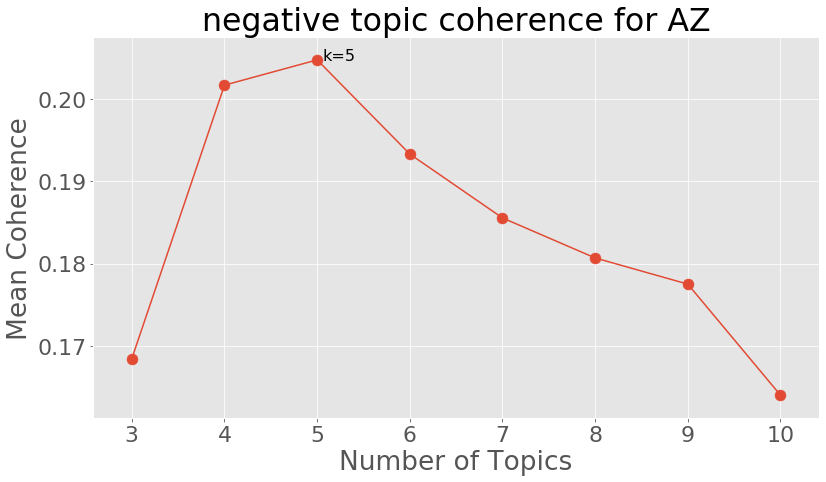


descriptors for negative texts in AZ :
Topic 01: table, wait, minutes, seat, sit, server, host
Topic 02: taste, chicken, fry, cheese, menu, look, salad
Topic 03: drink, bar, bartender, sit, night, beer, look
Topic 04: time, service, experience, customer, location, staff, long
Topic 05: ask, tell, manager, server, leave, know, waitress

======================= Analysis for IL ==============================

positive vocabulary has 617 distinct terms
negative vocabulary has 519 distinct terms

Created 1863 X 617 positive document-term matrix
Created 1142 X 519 negative document-term matrix

rank for positive words in IL :
01. time (629.00)
02. service (597.00)
03. bar (553.00)
04. beer (499.00)
05. drink (438.00)
06. delicious (404.00)
07. menu (384.00)
08. champaign (379.00)
09. amaze (365.00)
10. chicken (359.00)

rank for negative words in IL :
01. time (679.00)
02. service (592.00)
03. drink (502.00)
04. table (488.00)
05. bar (473.00)
06. ask (437.00)
07. wait (415.00)
08. minutes 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2429
K=04: Coherence=0.2467
K=05: Coherence=0.2121
K=06: Coherence=0.2217
K=07: Coherence=0.2163
K=08: Coherence=0.2021
K=09: Coherence=0.2077
K=10: Coherence=0.2078


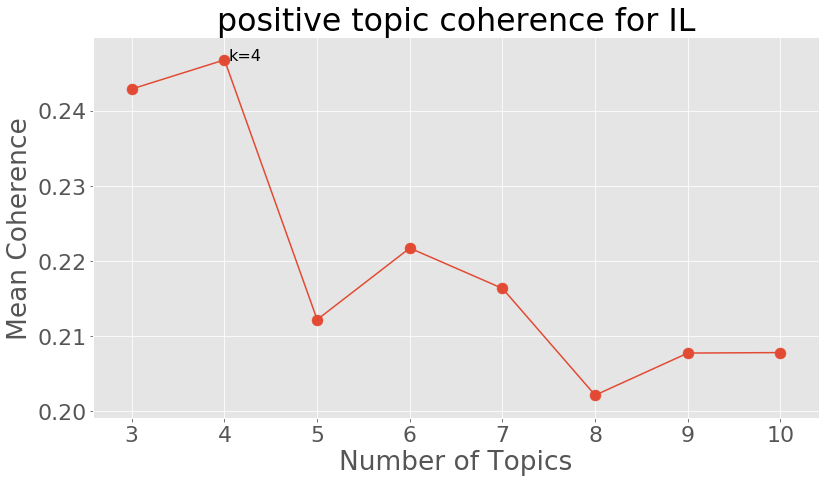


descriptors for positive texts in IL :
Topic 01: time, service, menu, night, drink, delicious, know
Topic 02: bar, beer, selection, drink, beers, tap, night
Topic 03: burger, cheese, fry, big, sandwich, delicious, mushroom
Topic 04: chicken, sauce, fry, black, bbq, dog, potato
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2147
K=04: Coherence=0.2154
K=05: Coherence=0.1952
K=06: Coherence=0.1887
K=07: Coherence=0.1738
K=08: Coherence=0.1672
K=09: Coherence=0.1802
K=10: Coherence=0.1641


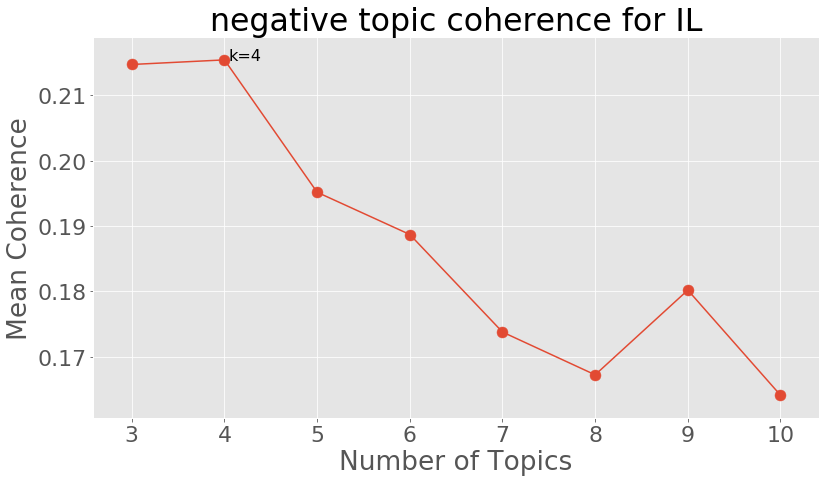


descriptors for negative texts in IL :
Topic 01: time, wait, minutes, service, drink, waitress, seat
Topic 02: chicken, taste, dish, menu, cheese, sauce, steak
Topic 03: bar, drink, beer, sit, bartender, look, know
Topic 04: table, ask, server, look, manager, tell, minutes

======================= Analysis for NC ==============================

positive vocabulary has 3336 distinct terms
negative vocabulary has 2865 distinct terms

Created 25239 X 3336 positive document-term matrix
Created 14822 X 2865 negative document-term matrix

rank for positive words in NC :
01. service (9070.00)
02. time (8430.00)
03. bar (6353.00)
04. drink (5975.00)
05. delicious (5560.00)
06. amaze (5552.00)
07. beer (5424.00)
08. charlotte (5015.00)
09. menu (4569.00)
10. staff (4543.00)

rank for negative words in NC :
01. time (8602.00)
02. service (8168.00)
03. drink (6643.00)
04. wait (6183.00)
05. ask (6092.00)
06. table (5976.00)
07. bar (5122.00)
08. minutes (5051.00)
09. tell (4231.00)
10. server (3

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2667
K=04: Coherence=0.2204
K=05: Coherence=0.2383
K=06: Coherence=0.2331
K=07: Coherence=0.2244
K=08: Coherence=0.2087
K=09: Coherence=0.2002
K=10: Coherence=0.2024


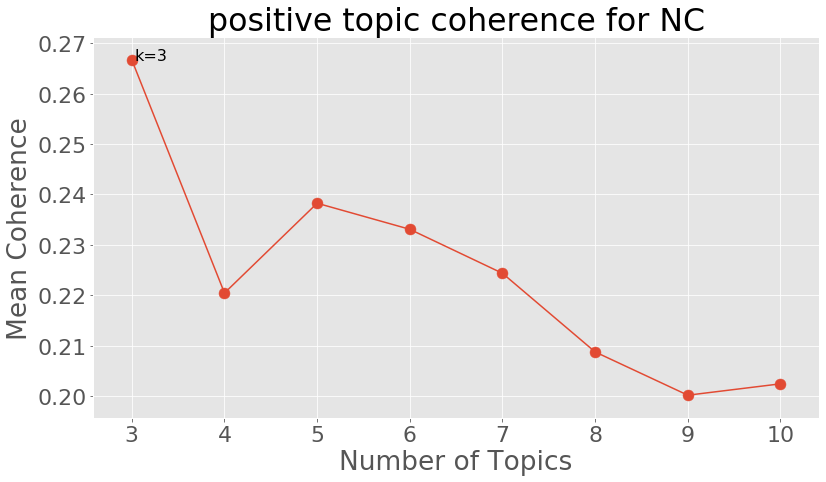


descriptors for positive texts in NC :
Topic 01: time, service, amaze, experience, excellent, staff, friendly
Topic 02: bar, beer, drink, selection, beers, area, dog
Topic 03: delicious, fry, cheese, chicken, menu, sauce, burger
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1806
K=04: Coherence=0.2003
K=05: Coherence=0.1939
K=06: Coherence=0.1857
K=07: Coherence=0.1808
K=08: Coherence=0.1791
K=09: Coherence=0.1843
K=10: Coherence=0.1807


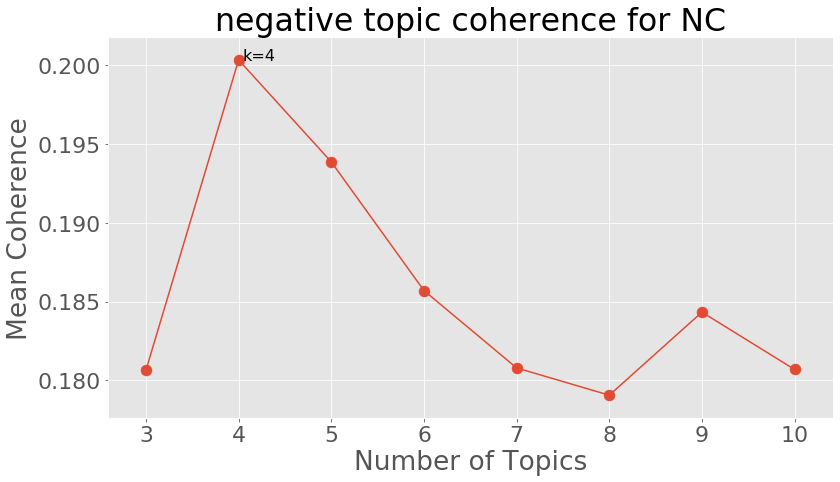


descriptors for negative texts in NC :
Topic 01: table, wait, minutes, ask, server, tell, seat
Topic 02: chicken, fry, taste, cheese, menu, sauce, salad
Topic 03: drink, bar, bartender, ask, beer, sit, service
Topic 04: time, service, experience, staff, customer, location, movie

======================= Analysis for NV ==============================

positive vocabulary has 8991 distinct terms
negative vocabulary has 7033 distinct terms

Created 133322 X 8991 positive document-term matrix
Created 64054 X 7033 negative document-term matrix

rank for positive words in NV :
01. service (54753.00)
02. time (51468.00)
03. vegas (48381.00)
04. drink (40229.00)
05. amaze (39929.00)
06. bar (32665.00)
07. delicious (28190.00)
08. nice (23073.00)
09. experience (21924.00)
10. night (21874.00)

rank for negative words in NV :
01. service (36411.00)
02. time (34124.00)
03. drink (30399.00)
04. ask (26589.00)
05. wait (22685.00)
06. table (22588.00)
07. tell (21243.00)
08. bar (20150.00)
09. minu

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2354
K=04: Coherence=0.2656
K=05: Coherence=0.2569
K=06: Coherence=0.2691
K=07: Coherence=0.2442
K=08: Coherence=0.2288
K=09: Coherence=0.2178
K=10: Coherence=0.2113


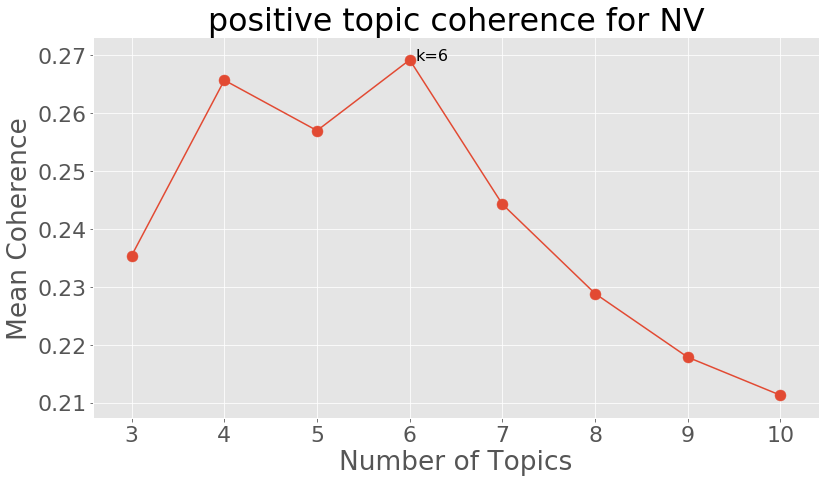


descriptors for positive texts in NV :
Topic 01: menu, dish, delicious, sauce, taste, flavor, meal
Topic 02: vegas, room, club, stay, hotel, strip, pool
Topic 03: drink, bar, night, bartender, fun, sit, beer
Topic 04: burger, fry, burgers, cheese, bachi, beef, sweet
Topic 05: time, wait, know, long, sure, friends, night
Topic 06: service, amaze, recommend, excellent, experience, friendly, staff
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1714
K=04: Coherence=0.1697
K=05: Coherence=0.1793
K=06: Coherence=0.1859
K=07: Coherence=0.1964
K=08: Coherence=0.1774
K=09: Coherence=0.1721
K=10: Coherence=0.1699


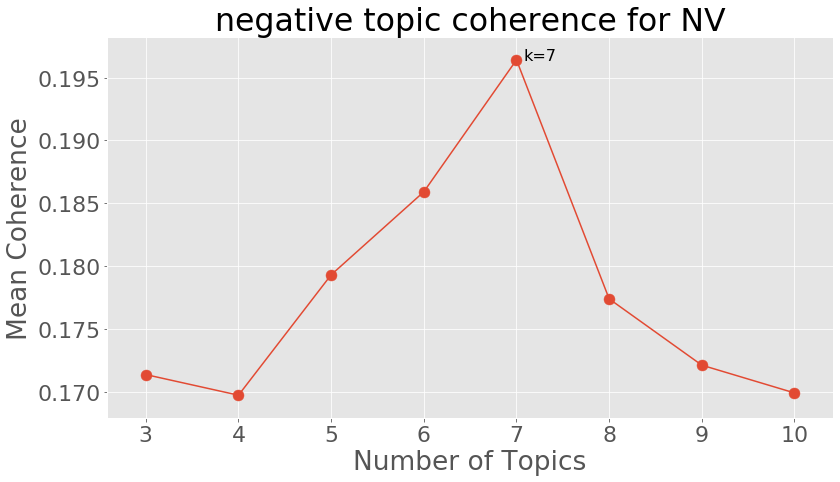


descriptors for negative texts in NV :
Topic 01: table, ask, wait, minutes, tell, server, seat
Topic 02: room, hotel, stay, call, check, desk, front
Topic 03: drink, bar, bartender, sit, ask, beer, look
Topic 04: taste, fry, burger, chicken, menu, look, steak
Topic 05: club, tell, line, night, pay, guy, vegas
Topic 06: service, customer, horrible, experience, star, slow, poor
Topic 07: time, long, wait, before, experience, check, waste

======================= Analysis for OH ==============================

positive vocabulary has 3556 distinct terms
negative vocabulary has 2835 distinct terms

Created 25012 X 3556 positive document-term matrix
Created 14255 X 2835 negative document-term matrix

rank for positive words in OH :
01. time (8650.00)
02. service (8335.00)
03. bar (7852.00)
04. drink (6933.00)
05. delicious (5903.00)
06. amaze (5761.00)
07. menu (5538.00)
08. beer (5213.00)
09. cleveland (4872.00)
10. nice (4542.00)

rank for negative words in OH :
01. time (7391.00)
02. se

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2023
K=04: Coherence=0.2533
K=05: Coherence=0.2417
K=06: Coherence=0.2209
K=07: Coherence=0.2156
K=08: Coherence=0.2279
K=09: Coherence=0.2161
K=10: Coherence=0.2159


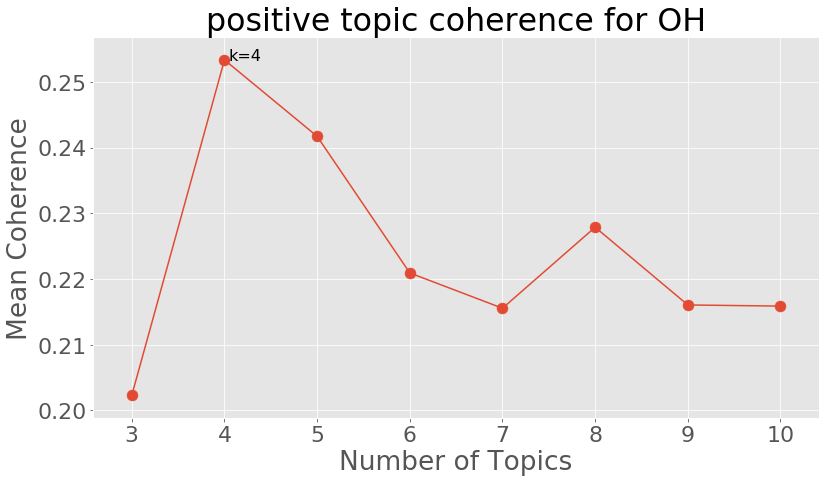


descriptors for positive texts in OH :
Topic 01: service, menu, delicious, amaze, nice, dish, dinner
Topic 02: bar, drink, beer, night, cleveland, game, selection
Topic 03: fry, cheese, burger, sandwich, chicken, beer, sauce
Topic 04: time, wait, service, experience, know, long, staff
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1996
K=04: Coherence=0.2122
K=05: Coherence=0.2008
K=06: Coherence=0.1969
K=07: Coherence=0.1933
K=08: Coherence=0.1901
K=09: Coherence=0.1775
K=10: Coherence=0.1717


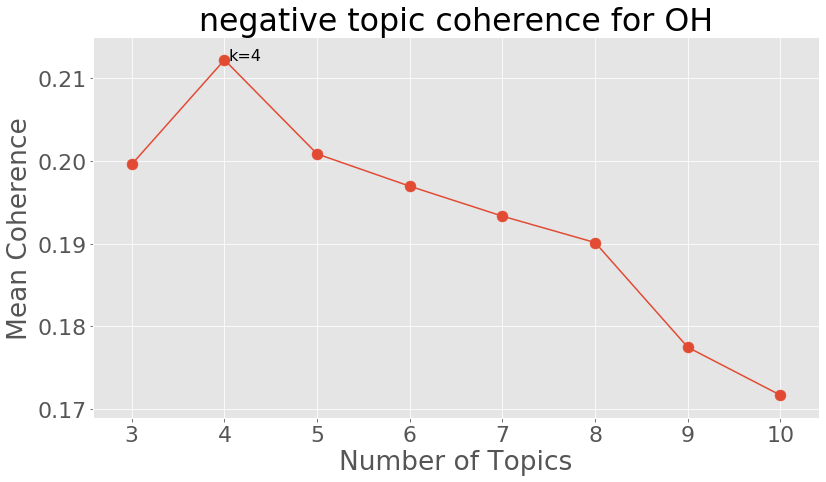


descriptors for negative texts in OH :
Topic 01: table, wait, minutes, ask, tell, server, seat
Topic 02: taste, chicken, fry, menu, cheese, sauce, look
Topic 03: bar, drink, bartender, sit, beer, service, night
Topic 04: time, service, experience, call, manager, slow, tell

======================= Analysis for ON ==============================

positive vocabulary has 3779 distinct terms
negative vocabulary has 3880 distinct terms

Created 23888 X 3779 positive document-term matrix
Created 20549 X 3880 negative document-term matrix

rank for positive words in ON :
01. service (10268.00)
02. time (8974.00)
03. drink (7372.00)
04. amaze (6863.00)
05. delicious (6337.00)
06. bar (6183.00)
07. menu (5933.00)
08. staff (5311.00)
09. friendly (5102.00)
10. nice (5026.00)

rank for negative words in ON :
01. service (13072.00)
02. time (11074.00)
03. drink (9501.00)
04. table (9343.00)
05. ask (8690.00)
06. wait (7510.00)
07. bar (6267.00)
08. server (6119.00)
09. tell (5750.00)
10. look (55

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2474
K=04: Coherence=0.2403
K=05: Coherence=0.2318
K=06: Coherence=0.2284
K=07: Coherence=0.2213
K=08: Coherence=0.2148
K=09: Coherence=0.2026
K=10: Coherence=0.2163


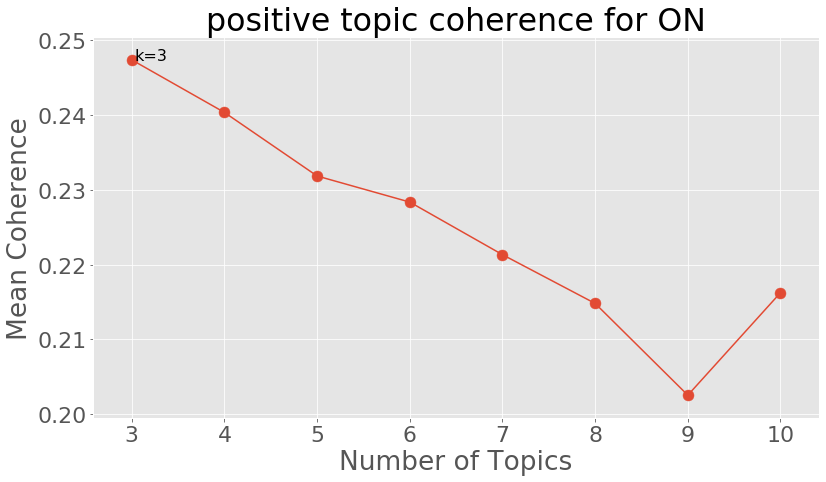


descriptors for positive texts in ON :
Topic 01: dish, fry, sauce, chicken, taste, menu, delicious
Topic 02: drink, bar, night, beer, table, look, menu
Topic 03: time, service, amaze, experience, staff, friendly, recommend
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1875
K=04: Coherence=0.2071
K=05: Coherence=0.2098
K=06: Coherence=0.1989
K=07: Coherence=0.1936
K=08: Coherence=0.1884
K=09: Coherence=0.1726
K=10: Coherence=0.1696


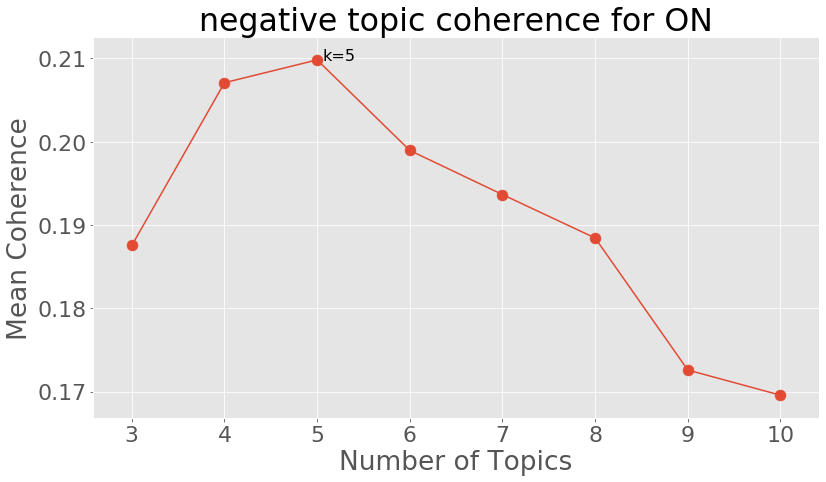


descriptors for negative texts in ON :
Topic 01: table, wait, seat, minutes, sit, host, arrive
Topic 02: fry, taste, chicken, dish, menu, wing, sauce
Topic 03: drink, bar, beer, night, look, friends, bartender
Topic 04: time, service, wait, experience, staff, slow, long
Topic 05: ask, server, tell, bill, manager, leave, waitress

======================= Analysis for PA ==============================

positive vocabulary has 3321 distinct terms
negative vocabulary has 2665 distinct terms

Created 20711 X 3321 positive document-term matrix
Created 11655 X 2665 negative document-term matrix

rank for positive words in PA :
01. time (7194.00)
02. bar (6551.00)
03. service (6547.00)
04. drink (6065.00)
05. delicious (5591.00)
06. beer (4858.00)
07. pittsburgh (4855.00)
08. amaze (4794.00)
09. menu (4509.00)
10. nice (3675.00)

rank for negative words in PA :
01. time (6080.00)
02. service (5561.00)
03. drink (5128.00)
04. bar (4716.00)
05. table (4562.00)
06. wait (4290.00)
07. ask (4100.0

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1928
K=04: Coherence=0.2582
K=05: Coherence=0.2268
K=06: Coherence=0.2307
K=07: Coherence=0.2216
K=08: Coherence=0.2454
K=09: Coherence=0.2408
K=10: Coherence=0.2369


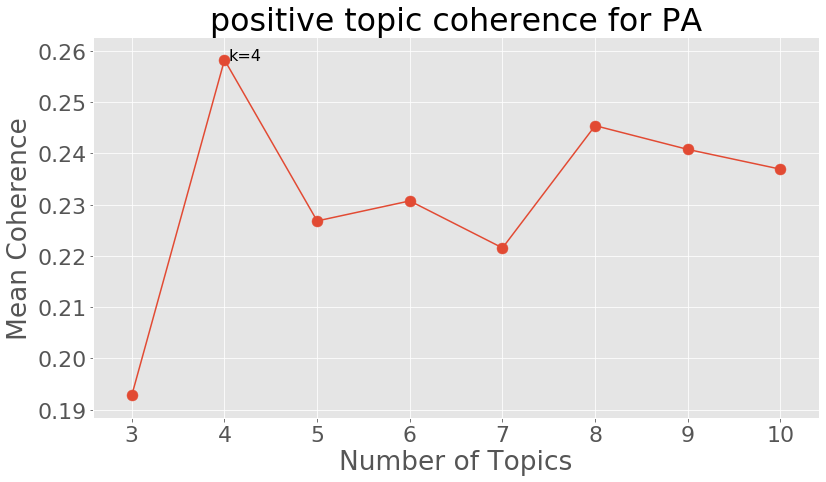


descriptors for positive texts in PA :
Topic 01: time, delicious, service, menu, amaze, table, dinner
Topic 02: bar, drink, time, night, pittsburgh, area, friendly
Topic 03: beer, selection, beers, pittsburgh, brew, pizza, tap
Topic 04: burger, fry, sandwich, cheese, burgers, chicken, sauce
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2055
K=04: Coherence=0.2151
K=05: Coherence=0.2109
K=06: Coherence=0.1979
K=07: Coherence=0.1997
K=08: Coherence=0.2088
K=09: Coherence=0.1963
K=10: Coherence=0.2084


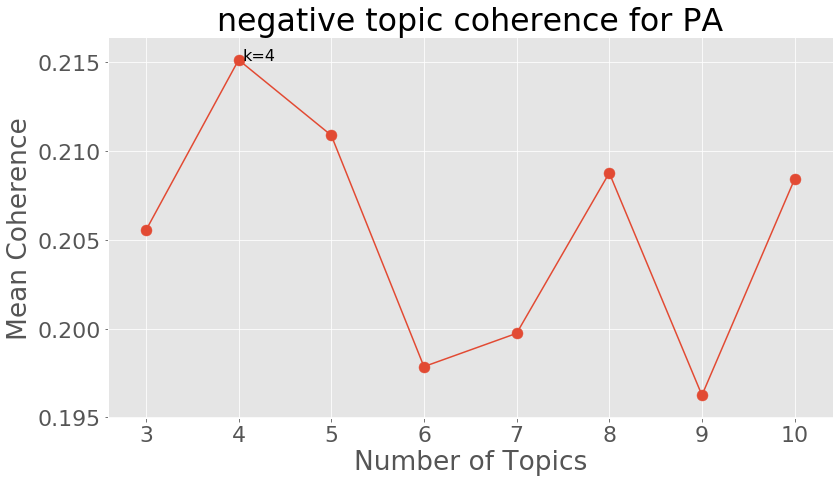


descriptors for negative texts in PA :
Topic 01: table, wait, minutes, ask, waitress, tell, seat
Topic 02: fry, sandwich, taste, burger, cheese, menu, chicken
Topic 03: bar, drink, bartender, beer, service, sit, night
Topic 04: time, service, experience, manager, server, tell, know

======================= Analysis for QC ==============================

positive vocabulary has 1743 distinct terms
negative vocabulary has 1105 distinct terms

Created 8194 X 1743 positive document-term matrix
Created 3519 X 1105 negative document-term matrix

rank for positive words in QC :
01. drink (3240.00)
02. bar (2755.00)
03. montreal (2584.00)
04. service (2489.00)
05. time (2209.00)
06. amaze (1807.00)
07. delicious (1789.00)
08. night (1635.00)
09. beer (1603.00)
10. menu (1564.00)

rank for negative words in QC :
01. service (1841.00)
02. drink (1696.00)
03. time (1374.00)
04. bar (1152.00)
05. ask (1139.00)
06. table (1094.00)
07. wait (1020.00)
08. leave (788.00)
09. waitress (777.00)
10. tel

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1796
K=04: Coherence=0.1561
K=05: Coherence=0.2127
K=06: Coherence=0.1921
K=07: Coherence=0.2069
K=08: Coherence=0.2131
K=09: Coherence=0.2030
K=10: Coherence=0.1933


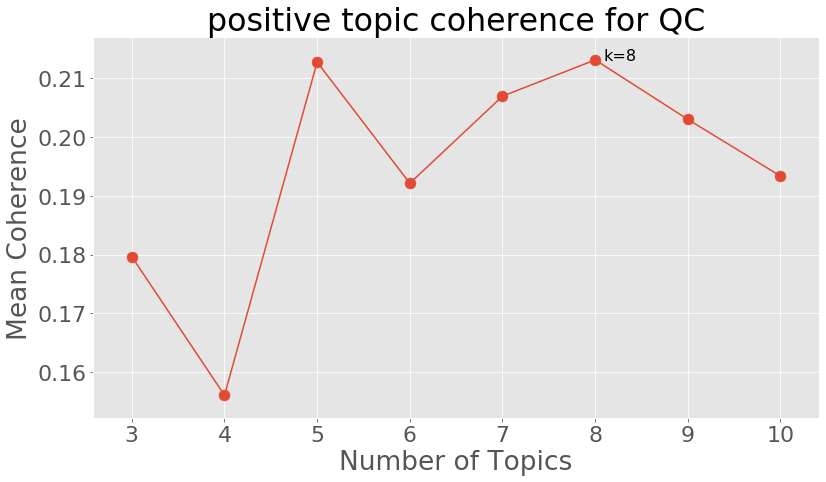


descriptors for positive texts in QC :
Topic 01: dish, menu, wine, cheese, taste, delicious, serve
Topic 02: drink, cocktails, menu, cocktail, bartenders, cool, fun
Topic 03: beer, beers, selection, brew, pub, nice, taste
Topic 04: bar, look, wine, cocktails, find, bartender, sit
Topic 05: montreal, trip, staff, old, french, experience, stay
Topic 06: service, amaze, recommend, delicious, excellent, friendly, atmosphere
Topic 07: time, long, know, wait, friends, ask, experience
Topic 08: night, table, staff, music, friendly, game, fun
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2071
K=04: Coherence=0.1939
K=05: Coherence=0.2028
K=06: Coherence=0.2074
K=07: Coherence=0.1848
K=08: Coherence=0.1757
K=09: Coherence=0.1743
K=10: Coherence=0.1713


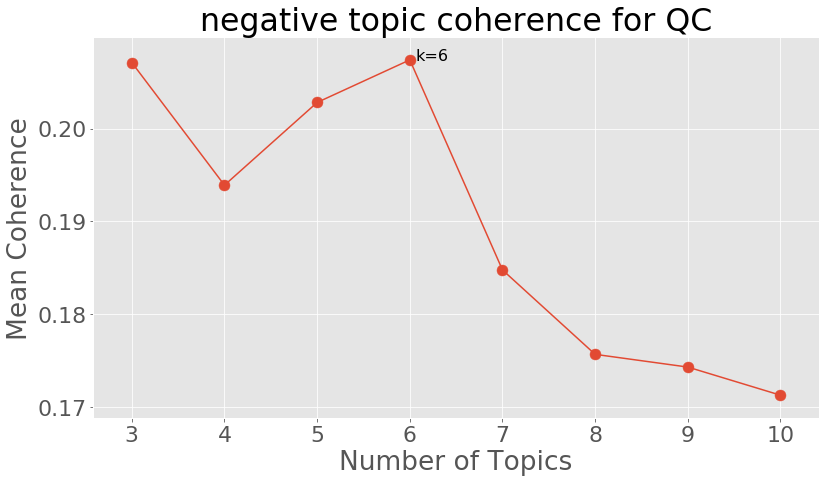


descriptors for negative texts in QC :
Topic 01: bar, beer, pay, bartender, time, night, tell
Topic 02: drink, night, water, glass, taste, cocktails, ice
Topic 03: fry, taste, dish, menu, cheese, burger, chicken
Topic 04: ask, waitress, wing, time, tell, bill, leave
Topic 05: service, time, tip, slow, serve, bill, pay
Topic 06: table, wait, minutes, seat, sit, tell, arrive

======================= Analysis for SC ==============================

positive vocabulary has 224 distinct terms
negative vocabulary has 297 distinct terms

Created 859 X 224 positive document-term matrix
Created 716 X 297 negative document-term matrix

rank for positive words in SC :
01. service (354.00)
02. time (261.00)
03. bar (203.00)
04. beer (195.00)
05. staff (190.00)
06. friendly (180.00)
07. drink (156.00)
08. amaze (148.00)
09. atmosphere (148.00)
10. delicious (146.00)

rank for negative words in SC :
01. time (430.00)
02. service (380.00)
03. table (285.00)
04. wait (282.00)
05. drink (279.00)
06. mi

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=05: Coherence=0.1965
K=06: Coherence=0.1681
K=07: Coherence=0.1687
K=08: Coherence=0.1614
K=09: Coherence=0.1599
K=10: Coherence=0.1697


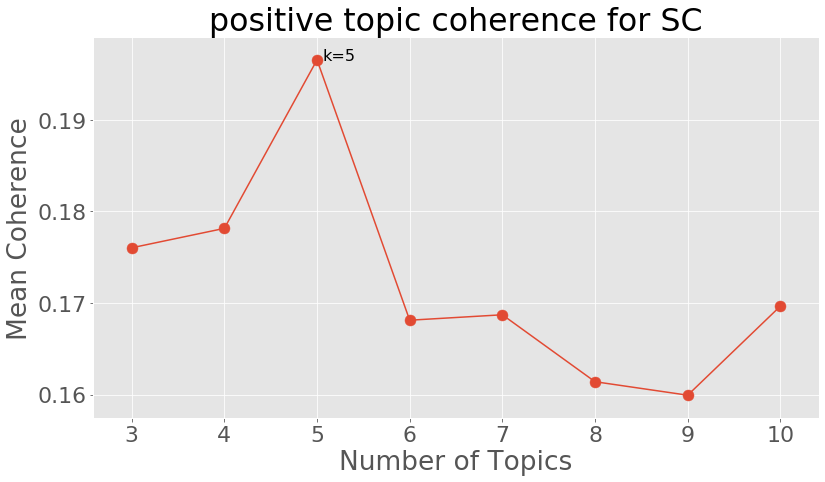


descriptors for positive texts in SC :
Topic 01: wait, enjoy, area, table, salad, menu, din
Topic 02: beer, bar, selection, wine, nice, staff, craft
Topic 03: service, excellent, delicious, amaze, bar, atmosphere, recommend
Topic 04: time, pizza, friendly, staff, wing, family, atmosphere
Topic 05: fry, burger, cheese, sauce, chicken, delicious, burgers
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
K=03: Coherence=0.1415
K=04: Coherence=0.1412
K=05: Coherence=0.1565
K=06: Coherence=0.1518
K=07: Coherence=0.1560


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=08: Coherence=0.1514
K=09: Coherence=0.1578
K=10: Coherence=0.1622


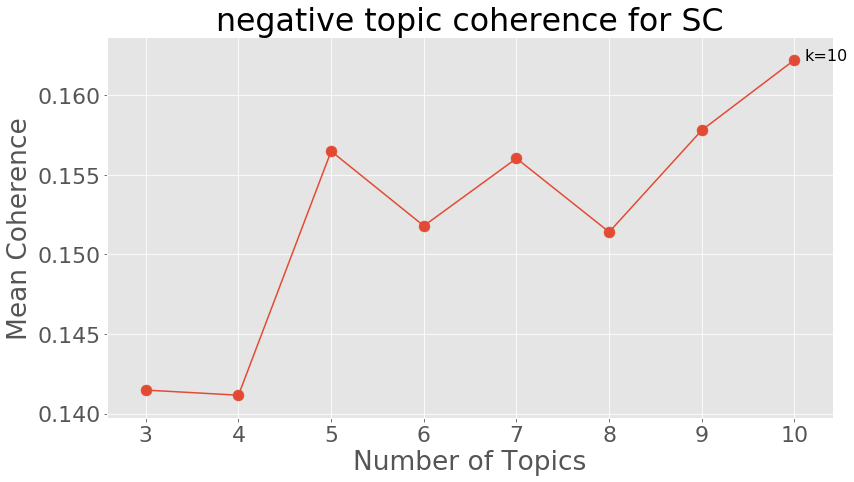


descriptors for negative texts in SC :
Topic 01: time, server, before, ask, salad, night, location
Topic 02: burger, experience, review, wife, half, bite, drive
Topic 03: bar, staff, sit, bartender, area, need, help
Topic 04: wait, minutes, kid, sit, finally, long, meal
Topic 05: chicken, fry, taste, sauce, wing, look, sandwich
Topic 06: service, slow, minutes, poor, staff, customer, lunch
Topic 07: manager, tell, ask, know, before, leave, seat
Topic 08: drink, sit, see, look, outside, beer, dinner
Topic 09: table, server, sit, clean, minutes, ask, seat
Topic 10: waitress, ask, wing, tell, table, leave, kitchen

======================= Analysis for WI ==============================

positive vocabulary has 2026 distinct terms
negative vocabulary has 1650 distinct terms

Created 9494 X 2026 positive document-term matrix
Created 5206 X 1650 negative document-term matrix

rank for positive words in WI :
01. bar (3308.00)
02. time (3252.00)
03. service (2913.00)
04. drink (2827.00)
05. be

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1804
K=04: Coherence=0.2021
K=05: Coherence=0.1849
K=06: Coherence=0.2088
K=07: Coherence=0.2376
K=08: Coherence=0.2420
K=09: Coherence=0.2506
K=10: Coherence=0.2537


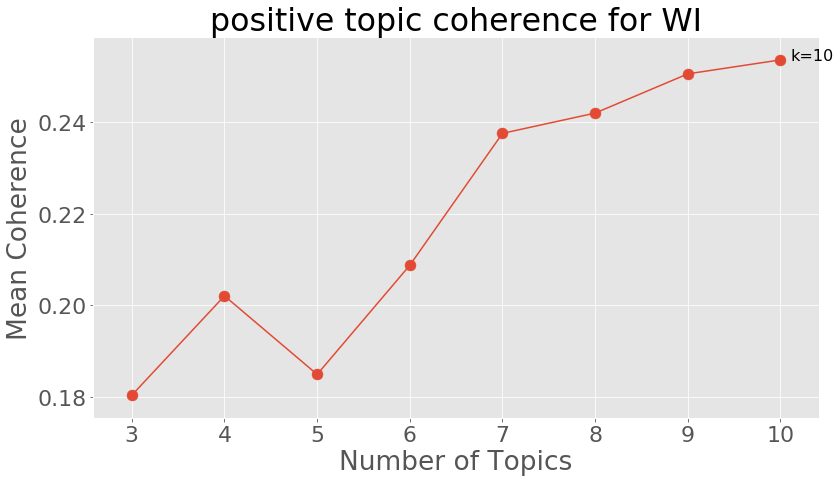


descriptors for positive texts in WI :
Topic 01: menu, dish, table, night, delicious, dinner, steak
Topic 02: burger, burgers, bacon, cook, sauce, bun, fry
Topic 03: bar, nice, table, area, sit, look, friendly
Topic 04: beer, selection, beers, tap, brew, list, menu
Topic 05: cheese, curds, old, fashion, wait, sauce, sandwich
Topic 06: time, wait, long, sure, table, nice, favorite
Topic 07: drink, night, old, friends, bartender, favorite, fun
Topic 08: fry, fish, sauce, friday, sandwich, delicious, burgers
Topic 09: service, amaze, friendly, excellent, recommend, atmosphere, staff
Topic 10: pizza, crust, amaze, pizzas, flavor, sauce, favorite
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.2197
K=04: Coherence=0.2427
K=05: Coherence=0.2223
K=06: Coherence=0.2237
K=07: Coherence=0.2098
K=08: Coherence=0.2062
K=09: Coherence=0.2025
K=10: Coherence=0.2119


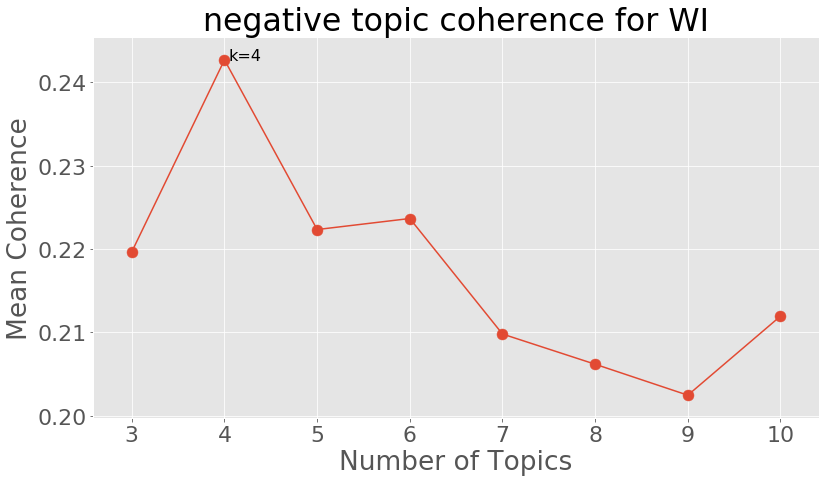


descriptors for negative texts in WI :
Topic 01: table, wait, minutes, ask, drink, server, tell
Topic 02: fry, cheese, menu, taste, burger, sauce, chicken
Topic 03: bar, drink, bartender, beer, sit, look, night
Topic 04: time, service, experience, staff, before, know, call


In [0]:
import pandas as pd
import string

custom_stop_words = []
with open( '/content/drive/My Drive/STAT628_Module3/bars/feature extraction/stopwords.txt', "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
# note that we need to make it hashable
print("Stopword list has %d entries" % len(custom_stop_words) )

city_list = ['AB','AZ','IL','NC','NV','OH','ON','PA','QC','SC','WI']
for city in city_list:
  print('\n======================= Analysis for',city,'==============================')
  path = '/content/drive/My Drive/STAT628_Module3/states/bars_review_' + city +'.csv'

  df = pd.read_csv(path)
  df = df.loc[df['text']!='']

  df_pos = df.loc[df['stars']>=5.0]
  df_neg = df.loc[df['stars']<=2.0]

  import numpy as np
  from sklearn.feature_extraction.text import CountVectorizer
  vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 20)
  # use a custom stopwords list, set the minimum term-document frequency to 20
  A_pos = vectorizer.fit_transform(df_pos['text'].apply(lambda x: np.str_(x)))
  terms_pos = vectorizer.get_feature_names()
  print("\npositive vocabulary has %d distinct terms" % len(terms_pos))
  A_neg = vectorizer.fit_transform(df_neg['text'].apply(lambda x: np.str_(x)))
  terms_neg = vectorizer.get_feature_names()
  print("negative vocabulary has %d distinct terms" % len(terms_neg))
  print( "\nCreated %d X %d positive document-term matrix" % (A_pos.shape[0], A_pos.shape[1]) )
  print( "Created %d X %d negative document-term matrix" % (A_neg.shape[0], A_neg.shape[1]) )

  raw_documents_pos = list(df_pos['text'])
  raw_documents_neg = list(df_neg['text'])
  from sklearn.externals import joblib
  joblib.dump((A_pos,terms_pos,raw_documents_pos), "articles-raw_pos.pkl") 
  joblib.dump((A_neg,terms_neg,raw_documents_neg), "articles-raw_neg.pkl") 

  import operator

  print('\nrank for positive words in',city,':')
  ranking = rank_terms( A_pos, terms_pos )
  for i, pair in enumerate( ranking[0:10] ):
      print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )
  print('\nrank for negative words in',city,':')
  ranking = rank_terms( A_neg, terms_neg )
  for i, pair in enumerate( ranking[0:10] ):
      print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )


      
############################################################################################################
#################################### Topic Coherence Evaluation ############################################
#############################################################################################################
  from sklearn import decomposition
  topic_models = []
  # try each value of k
  kmin, kmax = 3, 10
  for k in range(kmin,kmax+1):
      print("Applying NMF for k=%d ..." % k )
      # run NMF
      model = decomposition.NMF( init="nndsvd", n_components=k ) 
      W_pos = model.fit_transform( A_pos )
      H_pos = model.components_    
      # store for later
      topic_models.append( (k,W_pos,H_pos) )

  from itertools import combinations
  k_values = []
  coherences = []
  for (k,W_pos,H_pos) in topic_models:
      # Get all of the topic descriptors - the term_rankings, based on top 10 terms
      term_rankings = []
      for topic_index in range(k):
          term_rankings.append( get_descriptor( terms_pos, H_pos, topic_index, 7 ) )
      # Now calculate the coherence based on our Word2vec model
      k_values.append( k )
      coherences.append( calculate_coherence( w2v_model, term_rankings ) )
      print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

  %matplotlib inline
  import matplotlib
  import matplotlib.pyplot as plt
  plt.style.use("ggplot")
  matplotlib.rcParams.update({"font.size": 22})

  fig = plt.figure(figsize=(13,7))
  # create the line plot
  ax = plt.plot( k_values, coherences )
  plt.xticks(k_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Mean Coherence")
  plt.title('positive topic coherence for '+str(city))
  # add the points
  plt.scatter( k_values, coherences, s=120)
  # find and annotate the maximum point on the plot
  ymax = max(coherences)
  xpos = coherences.index(ymax)
  best_k = k_values[xpos]
  plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
  # show the plot
  plt.show()

  k = best_k
  from sklearn import decomposition
  model = decomposition.NMF( init="nndsvd", n_components=k ) 
  # apply the model and extract the two factor matrices
  W_pos = model.fit_transform( A_pos )
  H_pos = model.components_
  model = decomposition.NMF( init="nndsvd", n_components=k ) 
  print('\ndescriptors for positive texts in',city,':')
  descriptors = []
  for topic_index in range(k):
      descriptors.append( get_descriptor( terms_pos, H_pos, topic_index, 7 ) )
      str_descriptor = ", ".join( descriptors[topic_index] )
      print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )
      

  topic_models = []
  # try each value of k
  kmin, kmax = 3, 10
  for k in range(kmin,kmax+1):
      print("Applying NMF for k=%d ..." % k )
      # run NMF
      model = decomposition.NMF( init="nndsvd", n_components=k ) 
      W_neg = model.fit_transform( A_neg )
      H_neg = model.components_    
      # store for later
      topic_models.append( (k,W_neg,H_neg) )

  from itertools import combinations
  k_values = []
  coherences = []
  for (k,W_neg,H_neg) in topic_models:
      # Get all of the topic descriptors - the term_rankings, based on top 10 terms
      term_rankings = []
      for topic_index in range(k):
          term_rankings.append( get_descriptor( terms_neg, H_neg, topic_index, 10 ) )
      # Now calculate the coherence based on our Word2vec model
      k_values.append( k )
      coherences.append( calculate_coherence( w2v_model, term_rankings ) )
      print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

  # create the line plot

  %matplotlib inline
  import matplotlib
  import matplotlib.pyplot as plt
  plt.style.use("ggplot")
  matplotlib.rcParams.update({"font.size": 22})

  fig = plt.figure(figsize=(13,7))
  ax = plt.plot( k_values, coherences )
  plt.xticks(k_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Mean Coherence")
  plt.title('negative topic coherence for '+str(city))
  # add the points
  plt.scatter( k_values, coherences, s=120)
  # find and annotate the maximum point on the plot
  ymax = max(coherences)
  xpos = coherences.index(ymax)
  best_k = k_values[xpos]
  plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
  # show the plot
  plt.show()

  k = best_k
  from sklearn import decomposition
  model = decomposition.NMF( init="nndsvd", n_components=k ) 
  # apply the model and extract the two factor matrices
  W_neg = model.fit_transform( A_neg )
  H_neg = model.components_
  model = decomposition.NMF( init="nndsvd", n_components=k ) 
  print('\ndescriptors for negative texts in',city,':')
  descriptors = []
  for topic_index in range(k):
      descriptors.append( get_descriptor( terms_neg, H_neg, topic_index, 7 ) )
      str_descriptor = ", ".join( descriptors[topic_index] )
      print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )